In [1]:
import pandas as pd

# Load the dataset
file_path = '/content/Augmented_IndiaTransactMultiFacet2024.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

,trans_id,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,state,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,customer_id
0,295780.0,12/26/2023 0:55,5.795160e+11,fraud_Bedi-Krish Pvt Ltd,NaN,8552.65,Baiju,Sharma,F,"043, Lall Nagar, Dhule-732630",...,Rajasthan,-3.661078,145.222241,691077.0,"Surveyor, hydrographic",2/23/1993,-3.676868,145.213831,0.0,NaN
1,825718.0,7/7/2023 7:02,4.126110e+15,NaN,entertainment,9139.49,Bhavin,Roy,M,NaN,...,Meghalaya,NaN,-8.625930,NaN,Comptroller,10/20/1994,-14.437954,-8.607795,NaN,6.240000e+18
2,165012.0,4/25/2023 11:53,6.563210e+15,fraud_Hans-Kanda Pvt Ltd,entertainment,7568.37,Yuvraj,Madan,M,"04/41, Bawa Nagar, Khammam 816522",...,Mizoram,76.196973,102.564244,380244.0,Probation officer,10/18/1963,76.214025,102.567219,0.0,-2.610000e+18
3,NaN,5/28/2023 18:26,3.531340e+15,NaN,entertainment,9074.00,Drishya,Bumb,F,"53/26, Chana Ganj, Varanasi 329560",...,Chhattisgarh,27.840855,93.934433,440893.0,NaN,4/27/1996,27.838502,93.950223,0.0,2.190000e+18
4,742125.0,2/15/2023 18:55,4.800550e+12,"fraud_Agate, Varkey and Luthra Pvt Ltd",entertainment,5056.81,NaN,Lal,M,"43/32, Yohannan Zila, Udaipur-067444",...,Jharkhand,81.974419,71.656847,308606.0,Chiropodist,1/19/1994,81.959219,71.668432,0.0,-5.210000e+18


In [2]:
# Display the column names to identify the correct ones
print(df.columns)


Index(['trans_id', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'lat',
       'long', 'city_pop', 'job', 'dob', 'merch_lat', 'merch_long', 'is_fraud',
       'customer_id'],
      dtype='object')


In [3]:
# Check for null values in the dataset
print(df.isnull().sum())

# Remove all rows with null values
df_cleaned = df.dropna()

# Verify if all null values are removed
print(df_cleaned.isnull().sum())


trans_id                 649
trans_date_trans_time    850
cc_num                   633
merchant                 808
category                 797
amt                      751
first                    708
last                     802
gender                   773
street                   752
city                     730
state                    847
lat                      751
long                     741
city_pop                 757
job                      916
dob                      796
merch_lat                639
merch_long               918
is_fraud                 645
customer_id              801
dtype: int64
trans_id                 0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
lat                      0
long                     0


In [4]:
print(df_cleaned.isnull().sum())

trans_id                 0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
merch_lat                0
merch_long               0
is_fraud                 0
customer_id              0
dtype: int64


In [5]:
cleaned_file_path = '/content/Cleaned_Augmented_IndiaTransactMultiFacet2024.csv'
df_cleaned.to_csv(cleaned_file_path, index=False)

print(f"Cleaned dataset saved to {cleaned_file_path}")

Cleaned dataset saved to /content/Cleaned_Augmented_IndiaTransactMultiFacet2024.csv


In [6]:
import os

# List all files in the /content directory
os.listdir('/content')


['.config',
 'Augmented_IndiaTransactMultiFacet2024.csv',
 'Cleaned_Augmented_IndiaTransactMultiFacet2024.csv',
 'sample_data']

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Load the cleaned dataset
file_path = '/content/Cleaned_Augmented_IndiaTransactMultiFacet2024.csv'
df_cleaned = pd.read_csv(file_path)


                      count         mean          std     min      25%  \
category                                                                 
entertainment        2252.0  5138.745000  2822.317849  183.66  2764.51   
fitness_and_medical  1964.0  4982.351375  2816.941479  100.20  2600.41   
online_shopping      2342.0  4935.166396  2830.568397  154.59  2721.58   
travel               2195.0  5487.354169  2877.446445  130.72  3008.06   

                         50%      75%      max  
category                                        
entertainment        5099.29  7522.15  9980.26  
fitness_and_medical  4826.28  7431.48  9859.66  
online_shopping      4820.77  7258.02  9991.71  
travel               5995.21  7957.81  9886.11  


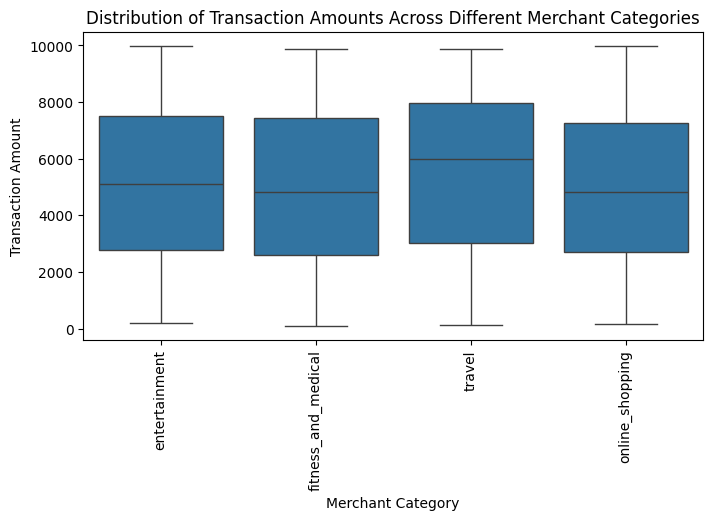

In [9]:
# 1.What is the distribution of transaction amounts across different merchant categories?

# Display summary statistics for each merchant category
category_group = df.groupby('category')['amt'].describe()
print(category_group)

# Set up the plot
plt.figure(figsize=(8, 4))

# Plot a boxplot to show the distribution of transaction amounts across merchant categories
sns.boxplot(x='category', y='amt', data=df)
plt.xticks(rotation=90)
plt.title('Distribution of Transaction Amounts Across Different Merchant Categories')
plt.xlabel('Merchant Category')
plt.ylabel('Transaction Amount')
plt.show()


city
Nagercoil      26
Sasaram        25
Srikakulam     25
Cuttack        23
Gulbarga       22
Muzaffarpur    22
Singrauli      19
Kochi          18
Proddatur      18
Kota           18
Name: count, dtype: int64


<ipython-input-12-2250fd00789f>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.values, y=top_cities.index, palette='viridis')


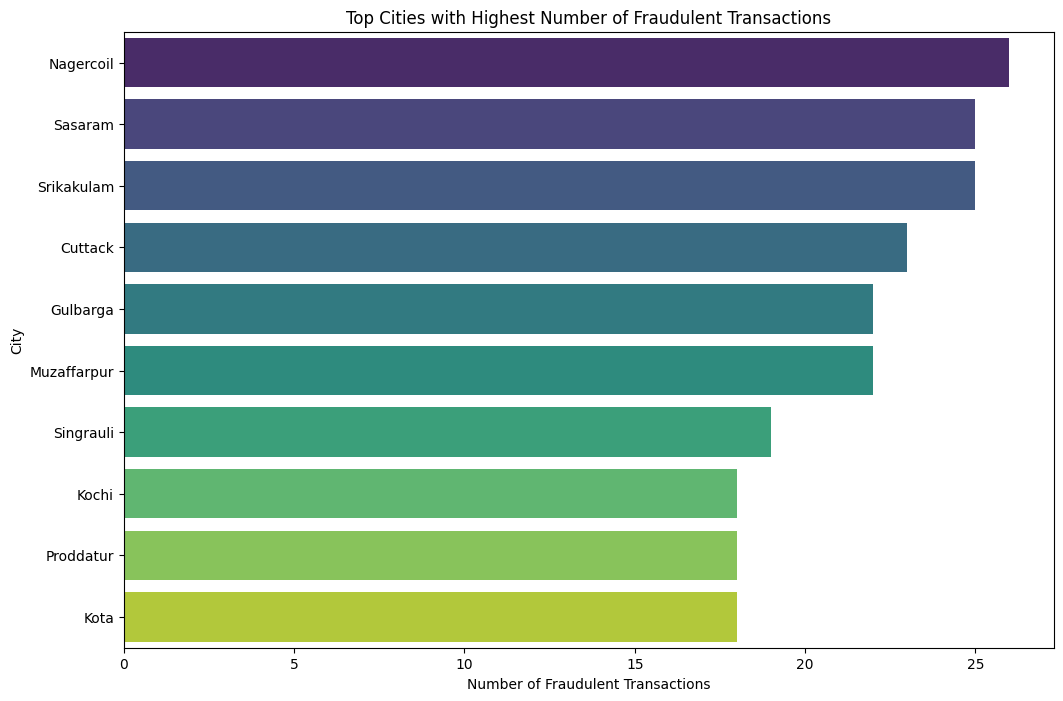

In [ ]:
# 2.Which cities have the highest number of fraudulent transactions?

# Filter the dataset for fraudulent transactions
fraudulent_transactions = df_cleaned[df_cleaned['is_fraud'] == 1]

# Group by city and count the number of fraudulent transactions
fraud_by_city = fraudulent_transactions['city'].value_counts()

# Display the top cities with the highest number of fraudulent transactions
top_cities = fraud_by_city.head(10)  # Adjust the number as needed
print(top_cities)

# Visualize the results
plt.figure(figsize=(12, 8))
sns.barplot(x=top_cities.values, y=top_cities.index, palette='viridis')
plt.title('Top Cities with Highest Number of Fraudulent Transactions')
plt.xlabel('Number of Fraudulent Transactions')
plt.ylabel('City')
plt.show()


               age  is_fraud
age       1.000000  0.001509
is_fraud  0.001509  1.000000


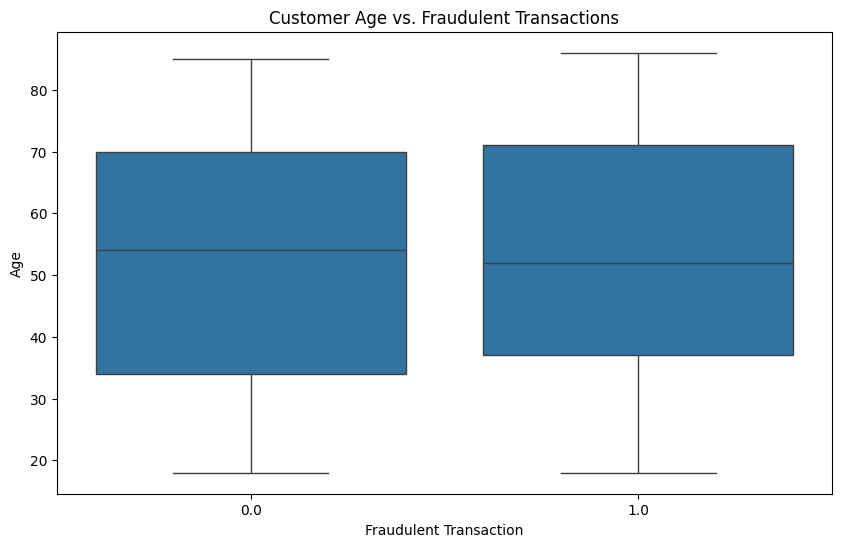

In [ ]:
#3. Is there a correlation between customer age (based on date of birth) and tendency towards fraudulent transactions?

from datetime import datetime

# Calculate the age of each customer
df_cleaned['dob'] = pd.to_datetime(df_cleaned['dob'])
df_cleaned['age'] = (datetime.now() - df_cleaned['dob']).dt.days // 365

# Check correlation between age and fraud
age_fraud_correlation = df_cleaned[['age', 'is_fraud']].corr()
print(age_fraud_correlation)

# Plot the relationship
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_fraud', y='age', data=df_cleaned)
plt.title('Customer Age vs. Fraudulent Transactions')
plt.xlabel('Fraudulent Transaction')
plt.ylabel('Age')
plt.show()


job
Accountant, chartered management         1.0
Insurance underwriter                    1.0
Investment banker, corporate             1.0
Land/geomatics surveyor                  1.0
Legal executive                          1.0
                                        ... 
Chief Operating Officer                  0.0
Product/process development scientist    0.0
Horticulturist, commercial               0.0
Producer, television/film/video          0.0
Race relations officer                   0.0
Name: is_fraud, Length: 234, dtype: float64


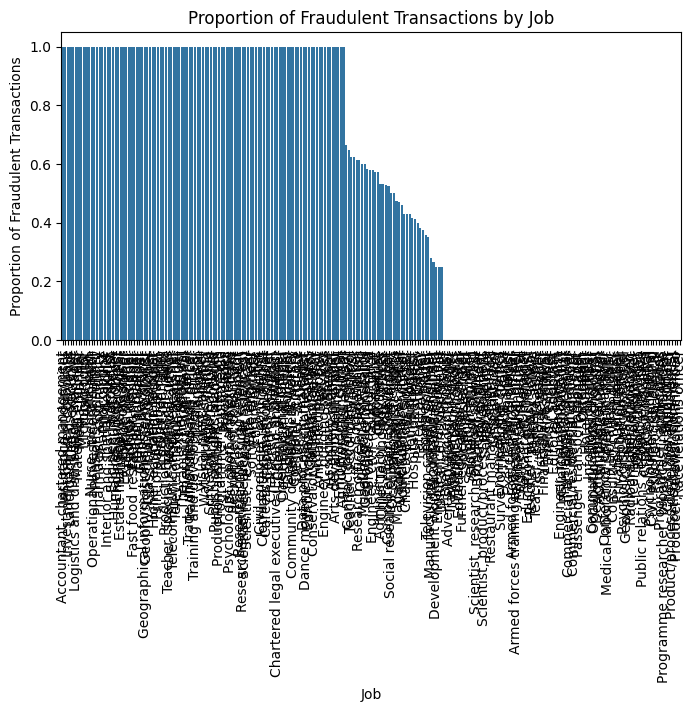

In [ ]:
# 4. Are certain types of jobs/professions more susceptible to fraudulent transactions?

# Group by job and calculate the proportion of fraudulent transactions
job_fraud = df_cleaned.groupby('job')['is_fraud'].mean().sort_values(ascending=False)
print(job_fraud)

# Plot the results
plt.figure(figsize=(8, 4))
sns.barplot(x=job_fraud.index, y=job_fraud.values)
plt.xticks(rotation=90)
plt.title('Proportion of Fraudulent Transactions by Job')
plt.xlabel('Job')
plt.ylabel('Proportion of Fraudulent Transactions')
plt.show()


state
Kerala               73
Mizoram              65
Gujarat              64
Assam                53
Maharashtra          53
Arunachal Pradesh    51
Sikkim               49
West Bengal          48
Rajasthan            46
Goa                  45
Tripura              44
Bihar                42
Uttarakhand          41
Madhya Pradesh       39
Karnataka            38
Punjab               36
Jharkhand            33
Uttar Pradesh        32
Meghalaya            32
Haryana              31
Tamil Nadu           28
Andhra Pradesh       28
Odisha               28
Manipur              27
Nagaland             26
Telangana            22
Himachal Pradesh     19
Chhattisgarh         16
dtype: int64


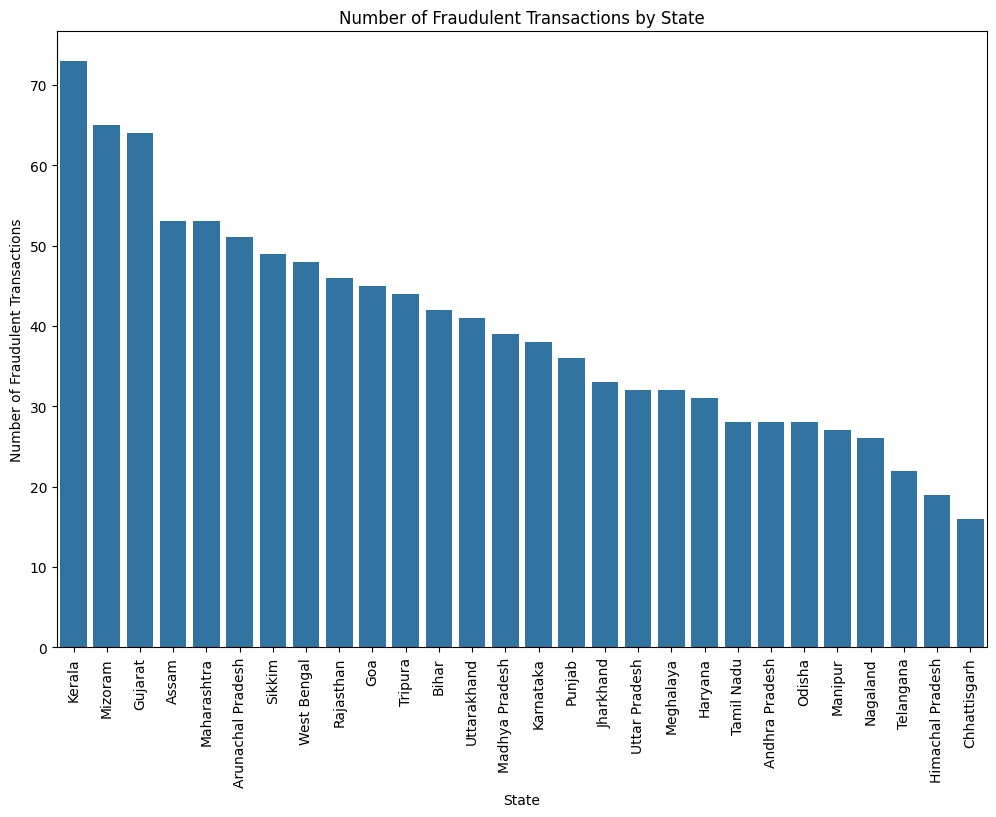

In [ ]:
#5. What is the geographic distribution of fraudulent transactions across different states?

# Group by state and count the number of fraudulent transactions
state_fraud = df_cleaned[df_cleaned['is_fraud'] == 1].groupby('state').size().sort_values(ascending=False)
print(state_fraud)

# Plot the results
plt.figure(figsize=(12, 8))
sns.barplot(x=state_fraud.index, y=state_fraud.values)
plt.xticks(rotation=90)
plt.title('Number of Fraudulent Transactions by State')
plt.xlabel('State')
plt.ylabel('Number of Fraudulent Transactions')
plt.show()


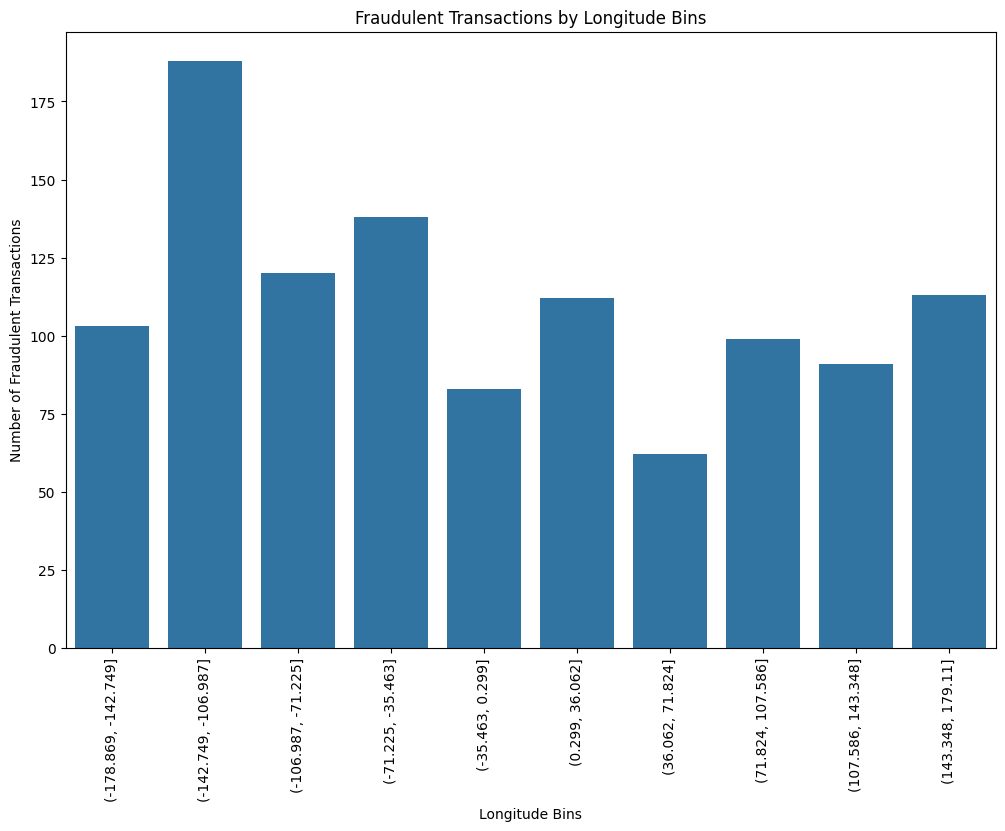

In [10]:
# 6. Are there any patterns or clusters in the latitude and longitude coordinates associated with fraudulent transactions?

# Bin the longitude into ranges
long_bins = pd.cut(df_cleaned['merch_long'], bins=10)

# Create a new DataFrame with the binned coordinates and fraud count
geo_fraud = df_cleaned[df_cleaned['is_fraud'] == 1].groupby(long_bins).size().reset_index(name='fraud_count')

# Plot the results using a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=geo_fraud['merch_long'], y=geo_fraud['fraud_count'])
plt.xticks(rotation=90)
plt.title('Fraudulent Transactions by Longitude Bins')
plt.xlabel('Longitude Bins')
plt.ylabel('Number of Fraudulent Transactions')
plt.show()


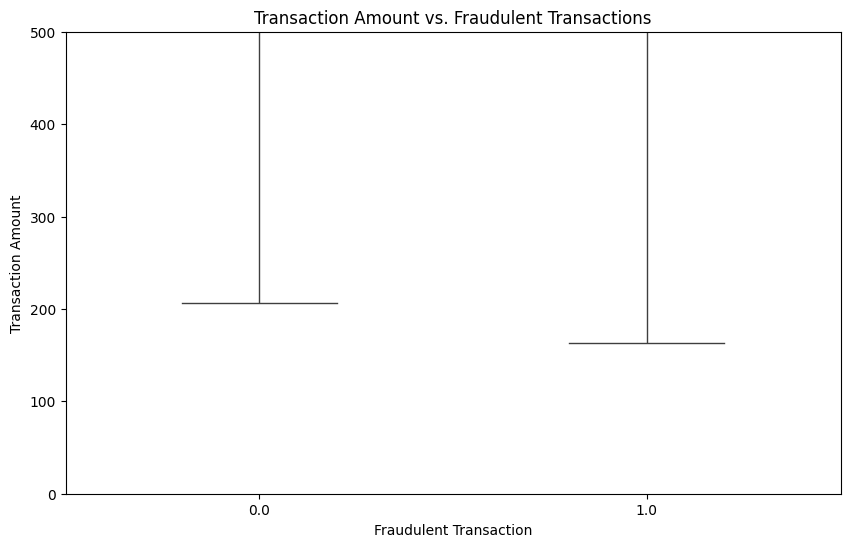

In [ ]:
# 7. Is there a relationship between transaction amount and the likelihood of fraud?

# Plot the relationship between transaction amount and fraud
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_fraud', y='amt', data=df_cleaned)
plt.ylim(0, 500)  # Limit the y-axis for better visualization
plt.title('Transaction Amount vs. Fraudulent Transactions')
plt.xlabel('Fraudulent Transaction')
plt.ylabel('Transaction Amount')
plt.show()



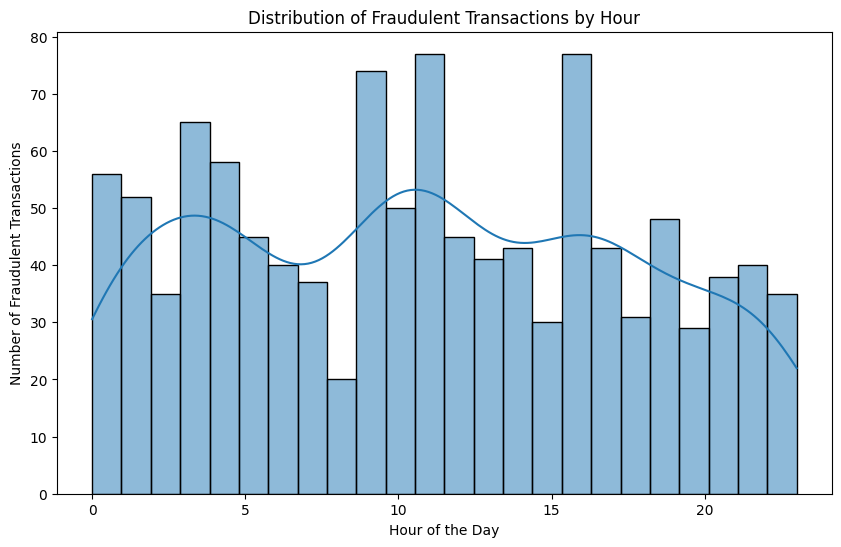

In [ ]:
# 8. Are there any temporal patterns in the occurrence of fraudulent transactions (based on transaction date and time)?
# Convert transaction date and time to datetime format
df_cleaned['trans_date_trans_time'] = pd.to_datetime(df_cleaned['trans_date_trans_time'])

# Extract hour from transaction time
df_cleaned['trans_hour'] = df_cleaned['trans_date_trans_time'].dt.hour

# Plot the distribution of fraudulent transactions by hour
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned[df_cleaned['is_fraud'] == 1]['trans_hour'], bins=24, kde=True)
plt.title('Distribution of Fraudulent Transactions by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Fraudulent Transactions')
plt.show()


merchant
fraud_Ramesh, Mandal and Chauhan Pvt Ltd      15
fraud_Dugar-Lal Pvt Ltd                       14
fraud_Chada, Bedi and Sampath Pvt Ltd         13
fraud_Bhatnagar, Chandran and Sama Pvt Ltd    12
fraud_Kannan Group Pvt Ltd                    11
fraud_Bhasin-Dalal Pvt Ltd                    11
fraud_Sekhon and Sons Pvt Ltd                 11
fraud_Dugar, Bajwa and Kamdar Pvt Ltd         11
fraud_Shroff, Baral and Tiwari Pvt Ltd        11
fraud_Bandi, Thaman and Yadav Pvt Ltd         11
dtype: int64


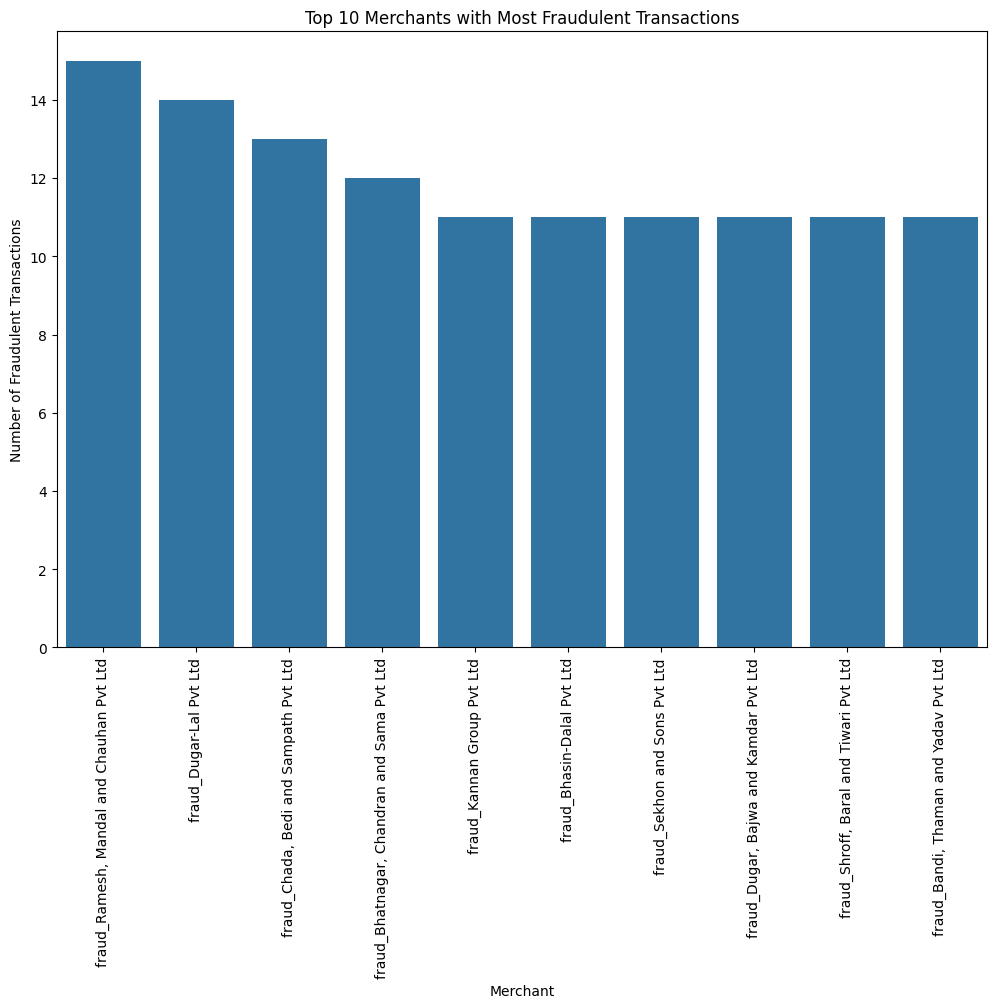

In [ ]:
# 9. Which merchant names are most frequently associated with fraudulent transactions?

# Group by merchant and count the number of fraudulent transactions
merchant_fraud = df_cleaned[df_cleaned['is_fraud'] == 1].groupby('merchant').size().sort_values(ascending=False).head(10)
print(merchant_fraud)

# Plot the results
plt.figure(figsize=(12, 8))
sns.barplot(x=merchant_fraud.index, y=merchant_fraud.values)
plt.xticks(rotation=90)
plt.title('Top 10 Merchants with Most Fraudulent Transactions')
plt.xlabel('Merchant')
plt.ylabel('Number of Fraudulent Transactions')
plt.show()


trans_id                 0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
merch_lat                0
merch_long               0
is_fraud                 0
customer_id              0
age                      0
trans_hour               0
dtype: int64


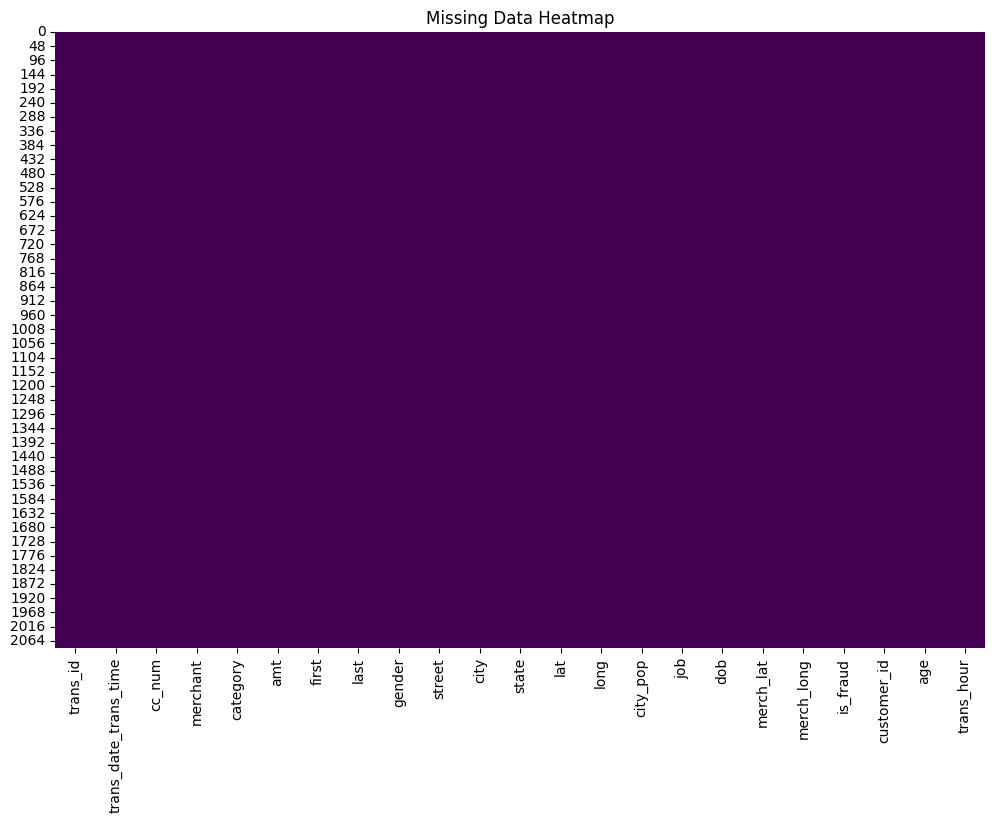

In [ ]:
# 10. Are there any missing or inconsistent data points that need to be addressed for better analysis?
# Check for missing values
missing_values = df_cleaned.isnull().sum()
print(missing_values)

# Visualize missing values
plt.figure(figsize=(12, 8))
sns.heatmap(df_cleaned.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()
